# UNB - PPGI
# Processamento de Imagem
## Trabalho 07

Henrique Brandão

___

Dada a seguinte imagem 

[warning-triangle.jpg] 

Use processamento de imagens para gerar uma imagem binária da forma geométrica predominante e processamento morfológico para transformar em um objeto sólido.  

Usando o método dos momentos invariantes descubra qual das imagens abaixo mais se encaixa na imagem binária resultante do seu processamento.   

[ imagens.png]  

Entrega é um documento em PDF em formato de relatório. Código só em sessão de anexo/apêndice. Não precisa enrolar nem colocar background, mas precisa discutir o que você está fazendo e discutir os resultados. 

# 1) Isolando a forma

In [1]:
import cv2

import numpy as np
import seaborn as sns

from math import sqrt
from random import choice

from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
f = 'warning-triangle.jpg'
x = cv2.imread(f)
x = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)

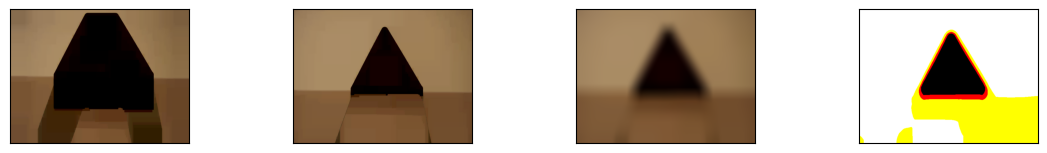

In [3]:
kernel = np.ones((100,100), np.uint8)

erosao = lambda x: cv2.erode(x, kernel, iterations=1)
dilatacao = lambda x: cv2.dilate(x, kernel, iterations=1)
tresh = lambda i: cv2.threshold(i, 50, 255, cv2.THRESH_BINARY)[-1]

plt.figure(figsize=(14,8))

__ = (
    erosao(x),
    dilatacao(erosao(x)),
    cv2.blur(dilatacao(erosao(x)), ksize=(50,50)),
    tresh(cv2.blur(dilatacao(erosao(x)), ksize=(50,50)))
)

for i,_ in enumerate(__):
    plt.subplot(len(__),4,i+1)
    plt.imshow(_)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [4]:
y = tresh(cv2.blur(dilatacao(erosao(x)), ksize=(50,50)))

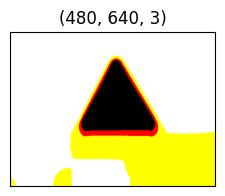

In [5]:
plt.figure(figsize=(3,2))

plt.imshow(y)
plt.title(y.shape)
plt.xticks([])
plt.yticks([])

plt.show()

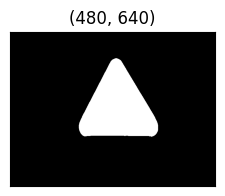

In [6]:
plt.figure(figsize=(3,2))

_ = y[:,:,1]

plt.imshow(_, cmap='Greys')
plt.title(_.shape)
plt.xticks([])
plt.yticks([])

plt.show()

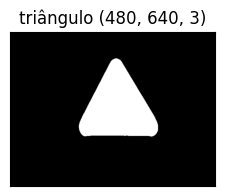

In [7]:
plt.figure(figsize=(3,2))

__ = np.zeros(shape=(480,640,3)).astype(np.uint8)

__[:,:,0] = _
__[:,:,1] = _
__[:,:,2] = _

triangulo = 255 - __

plt.imshow(triangulo)
plt.title(f'triângulo {triangulo.shape}')
plt.xticks([])
plt.yticks([])

plt.show()

# 2) Momentos invariantes

In [8]:
!ls | grep png

disco.png
elipse.png
paralelogramo.png
quadrado.png
trapezio.png
triangulo.png
triangulo2.png
trianguloRetangulo.png


In [9]:
hip = 'disco.png elipse.png paralelogramo.png quadrado.png trapezio.png triangulo.png triangulo2.png trianguloRetangulo.png'.split()
hip = [(h.split('.')[0], cv2.imread(h)) for h in hip]
len(hip)

8

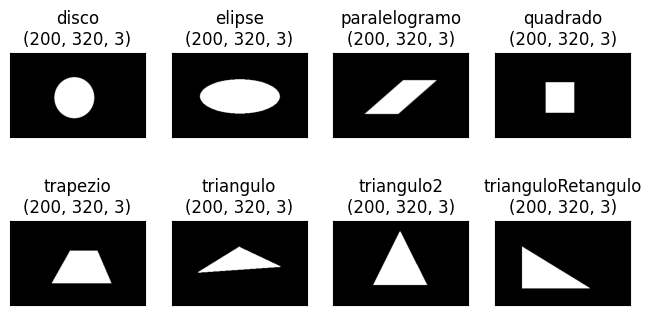

In [10]:
plt.figure(figsize=(8,4))

i = 1
for h in hip:
    plt.subplot(2,4,i)
    plt.title(f'{h[0]}\n{h[-1].shape}')
    plt.imshow(h[-1])
    plt.xticks([])
    plt.yticks([])
    i += 1

plt.show()

In [11]:
def run(i1, i2):
    i1, i2 = cv2.cvtColor(i1, cv2.COLOR_BGR2GRAY), cv2.cvtColor(i2, cv2.COLOR_BGR2GRAY)
    m1, m2 = cv2.moments(i1), cv2.moments(i2)
    hum1, hum2 = cv2.HuMoments(m1), cv2.HuMoments(m2)
    # dist = np.linalg.norm(hum1 - hum2)
    dist_hu7 = np.abs(hum1[-1] - hum2[-1])
    return dist_hu7

In [12]:
deltas = []

for h in hip:
    d = run(triangulo, h[-1])
    deltas.append((h[0], d))

In [13]:
sorted(deltas, key=lambda x: x[-1])

[('triangulo2', array([5.97450393e-25])),
 ('paralelogramo', array([1.89609713e-24])),
 ('disco', array([1.89609713e-24])),
 ('elipse', array([1.89609713e-24])),
 ('quadrado', array([1.89609713e-24])),
 ('trapezio', array([5.18521808e-23])),
 ('triangulo', array([3.74813534e-21])),
 ('trianguloRetangulo', array([4.88647881e-21]))]

In [14]:
_ = sorted(deltas, key=lambda x: x[-1])[0][0]

print(f'A figura mais próxima é o(a): {_}')

A figura mais próxima é o(a): triangulo2
